# Logistic Regression

In [1]:
import numpy as np

In [2]:
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [3]:
class LogisticRegression:
    """Logistic Regression implementation.

    This class provides functionalities to perform logistic regression. Check the fit method.
    Expects a shuffled dataset.
    """
    
    e = 1e-35
    
    def __init__(self):
        """use If required to make model persistent."""
        
        pass
    
    def sigmoid_dot(self, X, W, b):
        """Returns sigmoid of (W.X + b)"""
        
        return 1 / (1 + np.exp(-(np.dot(X, W) + b)))
    
    def update(self, X, res, W, b, alpha, m):
        """Updates W, b stochastically for each datapoint."""
        
        #res = y-y_
        for i in range(m):

            dJ_dW = np.dot(res[i],X[i])
            dJ_db = np.mean(res)
            
            W += alpha * dJ_dW / m
            b += alpha * dJ_db / m
        return W, b 
    
    def create_plot(self, costs):
        """Create line plots for cost and validation cost"""
        
        plt.title("Cost v/s vCost")
        plt.plot(np.arange(0,len(costs["cost"])), costs["cost"], label="Cost")
        plt.plot(np.arange(0,len(costs["vcost"])), costs["vcost"], label="vCost")
        plt.legend()
    
    def cost(self, y, y_, e=e):
        """Returns logistic cost between predicted values and true labels."""
        
        m = y.shape[0]
        c = 0
        
        for i in range(m):
            c += y[i] * np.log(y_[i] + e) + (1 - y[i]) * np.log(1 - y_[i] + e)
        return c / (-m)
    
    def fit(self, X, y, iterations=1000, alpha=0.000001, validation_size=0.4):
        """
        Fits the logistic regression model to the training data.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (m, n).
        y : np.ndarray
            True labels of shape (m,).
        iterations : int, optional
            Number of iterations for training. Default is 1000.
        alpha : float, optional
            Learning rate. Default is 0.000001
        validation_size : float, optional
            Portion of data to be used for validation from the end of the data

        Returns
        -------
        tuple
            Trained model parameters W and b.
        """
        val = int(X.shape[0]*(1-validation_size))
        X_val, y_val = X[val:], y[val:]
        X, y =  X[:val], y[:val]
        
        costs = {"cost":[], "vcost":[]}
        
        print(X.shape, y.shape, X_val.shape, y_val.shape)
        m, n = X.shape
        W = np.zeros(n)
        b = 0
        
        for k in range(iterations):
            y_ = self.sigmoid_dot(X, W, b)
            
            y_val_ = self.sigmoid_dot(X_val, W, b)
            res = y - y_
            W, b = self.update(X, res, W, b, alpha,m)
            
            costs["cost"].append(self.cost(y, y_))
            costs["vcost"].append(self.cost(y_val,y_val_))
            if k%(iterations//10) == 0:
                print(f"Iteration: {k}",
                      f"Cost: {self.cost(y, y_)}",
                      f"vCost: {self.cost(y_val,y_val_)}",
                      f"f1: {f1_score(y, y_.round()):.5f}",
                      f"vf1: {f1_score(y_val, y_val_.round()):.5f}"
                     )
            
        self.create_plot(costs)
        return W, b, costs
    
    def predict(self, X, W, b):
        """Generates predictions for input data X using trained model parameters W and b.
        
        Returns rounded predictions. Might need to fix.
        """
        
        s = self.sigmoid_dot(X, W, b)
        return s.round()

# Usage

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(1000, 4, random_state=0)

(600, 4) (600,) (400, 4) (400,)
Iteration: 0 Cost: 0.6931471805599468 vCost: 0.6931471805599467 f1: 0.00000 vf1: 0.00000
Iteration: 100 Cost: 0.1969210983018642 vCost: 0.21691042940505775 f1: 0.94807 vf1: 0.92583
Iteration: 200 Cost: 0.17273662037724957 vCost: 0.19730292421491533 f1: 0.94983 vf1: 0.93095
Iteration: 300 Cost: 0.164637843309963 vCost: 0.1917083258119916 f1: 0.95159 vf1: 0.93095
Iteration: 400 Cost: 0.16079148865336285 vCost: 0.18950656493906098 f1: 0.95333 vf1: 0.93095
Iteration: 500 Cost: 0.15865709006510967 vCost: 0.18855617774803934 f1: 0.95507 vf1: 0.93095
Iteration: 600 Cost: 0.1573642163893076 vCost: 0.18816367683267327 f1: 0.95507 vf1: 0.93095
Iteration: 700 Cost: 0.15653608130313162 vCost: 0.18804499251868026 f1: 0.95507 vf1: 0.93367
Iteration: 800 Cost: 0.1559847748272392 vCost: 0.18806650277362308 f1: 0.95681 vf1: 0.93367
Iteration: 900 Cost: 0.155607301029484 vCost: 0.18815966511208487 f1: 0.95681 vf1: 0.93367


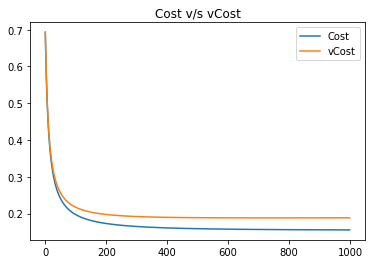

In [6]:
m = LogisticRegression()
W, b, costs = m.fit(X, y, 1000, 0.1)

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
X,y = load_breast_cancer(return_X_y=True)
X = X[:200]
y = y[:200]

(120, 30) (120,) (80, 30) (80,)
Iteration: 0 Cost: 0.6931471805599461 vCost: 0.6931471805599456 f1: 0.00000 vf1: 0.00000
Iteration: 100 Cost: 0.4668464921514406 vCost: 0.5679198931061263 f1: 0.24561 vf1: 0.15686
Iteration: 200 Cost: 0.42038066921505707 vCost: 0.49465089161853387 f1: 0.73171 vf1: 0.68493
Iteration: 300 Cost: 0.39189067339003364 vCost: 0.44975389640840185 f1: 0.82222 vf1: 0.85714
Iteration: 400 Cost: 0.3719528233538483 vCost: 0.41866843080864224 f1: 0.81319 vf1: 0.87356
Iteration: 500 Cost: 0.35683666003994485 vCost: 0.3955222855192246 f1: 0.87500 vf1: 0.91111
Iteration: 600 Cost: 0.34476578562314575 vCost: 0.37745119960246143 f1: 0.87500 vf1: 0.92473
Iteration: 700 Cost: 0.33477947939996977 vCost: 0.36286994919553917 f1: 0.87500 vf1: 0.93617
Iteration: 800 Cost: 0.32630639891896807 vCost: 0.3508169723566357 f1: 0.88660 vf1: 0.94737
Iteration: 900 Cost: 0.31898102882835094 vCost: 0.3406676100732426 f1: 0.89796 vf1: 0.94737


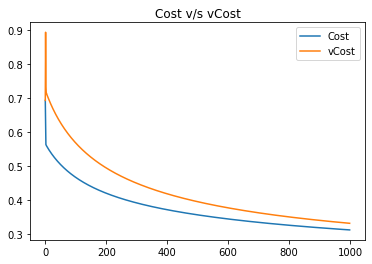

In [9]:
m = LogisticRegression()
W, b, costs = m.fit(X, y, 1000, 0.000005)

In [10]:
from sklearn.datasets import make_circles

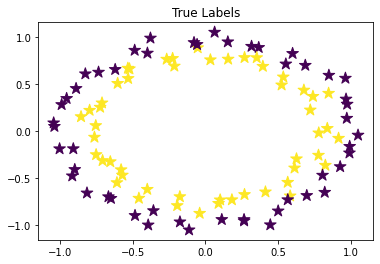

In [11]:
X,y = make_circles(100,noise=0.05)
a = X[:,0]
b = X[:,1]
plt.title("True Labels")
plt.scatter(a, b, c=y, marker="*", s=150)

X_p = np.c_[a, b, a**2, a*b, b**2] # degree 2

(60, 5) (60,) (40, 5) (40,)
Iteration: 0 Cost: 0.6931471805599451 vCost: 0.6931471805599446 f1: 0.00000 vf1: 0.00000
Iteration: 200 Cost: 0.4660524427829718 vCost: 0.5331361455457191 f1: 0.93333 vf1: 0.75000
Iteration: 400 Cost: 0.3616446479313425 vCost: 0.42178604543811293 f1: 0.96667 vf1: 0.86486
Iteration: 600 Cost: 0.30140185124126834 vCost: 0.3557765540562633 f1: 0.96667 vf1: 0.92308
Iteration: 800 Cost: 0.26261790174458405 vCost: 0.31280817733590055 f1: 0.96667 vf1: 0.92308
Iteration: 1000 Cost: 0.23559888570820883 vCost: 0.2826320668181317 f1: 0.96667 vf1: 0.92308
Iteration: 1200 Cost: 0.2156678371552712 vCost: 0.2602209131920193 f1: 0.96667 vf1: 0.92308
Iteration: 1400 Cost: 0.2003251038513068 vCost: 0.2428687535000162 f1: 0.96667 vf1: 0.92308
Iteration: 1600 Cost: 0.18812160045257473 vCost: 0.22899839351349996 f1: 0.96667 vf1: 0.92308
Iteration: 1800 Cost: 0.17816142725162018 vCost: 0.21762974832463575 f1: 0.96667 vf1: 0.92308


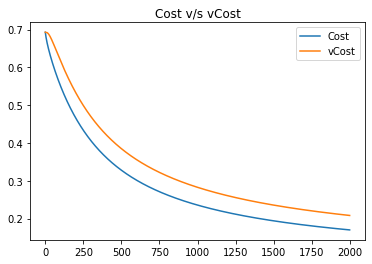

In [12]:
m = LogisticRegression()
W, b, costs = m.fit(X_p, y, 2000, 0.5)

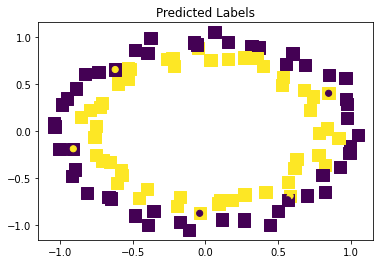

In [13]:
y_ = m.predict(X_p, W, b)
plt.title("Predicted Labels")
plt.scatter(X[:,0], X[:,1], c=y, marker=",", s=150)
plt.scatter(X[:,0], X[:,1], c=y_, marker=".", s=150)

In [14]:
from sklearn.datasets import make_moons

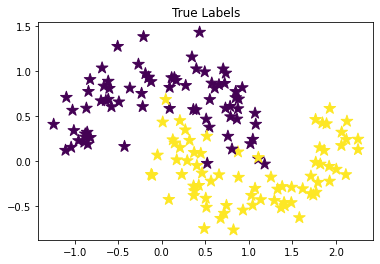

In [15]:
X,y = make_moons(150, noise=0.2)
a = X[:,0]
b = X[:,1]
plt.scatter(a, b, c=y, marker="*", s=150)
plt.title("True Labels")

X_p = np.c_[a, b, a**2, a*b, b**2, a**3, b**3, (a**2)*b, a*(b**2)] # degree 3

(90, 9) (90,) (60, 9) (60,)
Iteration: 0 Cost: 0.6931471805599457 vCost: 0.6931471805599451 f1: 0.00000 vf1: 0.00000
Iteration: 500 Cost: 0.13793542448342572 vCost: 0.1733489290040712 f1: 0.93976 vf1: 0.92308
Iteration: 1000 Cost: 0.11143002732500451 vCost: 0.15932015325290524 f1: 0.95238 vf1: 0.92308
Iteration: 1500 Cost: 0.09905505319971766 vCost: 0.1576626409727958 f1: 0.93976 vf1: 0.93939
Iteration: 2000 Cost: 0.09169207477572577 vCost: 0.1596377626480502 f1: 0.95122 vf1: 0.93939
Iteration: 2500 Cost: 0.08671966243632642 vCost: 0.16295262529756374 f1: 0.95122 vf1: 0.93939
Iteration: 3000 Cost: 0.0830880309776647 vCost: 0.16680047691239155 f1: 0.95122 vf1: 0.93939
Iteration: 3500 Cost: 0.08029053947680385 vCost: 0.17084564724839912 f1: 0.95122 vf1: 0.93939
Iteration: 4000 Cost: 0.07805102339669669 vCost: 0.17493388707137408 f1: 0.95122 vf1: 0.93939
Iteration: 4500 Cost: 0.0762053620952212 vCost: 0.17899032401958445 f1: 0.95122 vf1: 0.93939


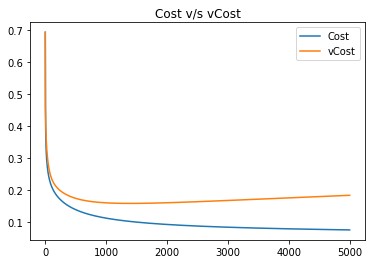

In [16]:
m = LogisticRegression()
W, b, costs = m.fit(X_p, y, 1000*5, 0.5)

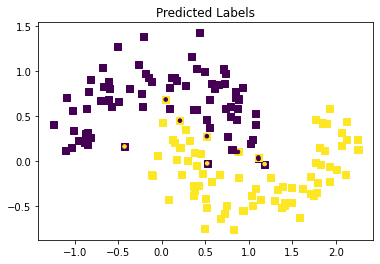

In [17]:
y_ = m.predict(X_p, W, b)
plt.title("Predicted Labels")
plt.scatter(X[:,0], X[:,1], c=y, marker=",", s=50)
plt.scatter(X[:,0], X[:,1], c=y_, marker=".", s=50)

In [18]:
a = (2+1)*np.random.rand(1000) -1 # scaled to [-1, 2]
b = (1+1)*np.random.rand(1000) -1 # scaled to [-1, 1]

In [19]:
X_p = np.c_[a, b, a**2, a*b, b**2, a**3, b**3, (a**2)*b, a*(b**2)] # degree 3

In [20]:
y_ = m.predict(X_p, W, b)

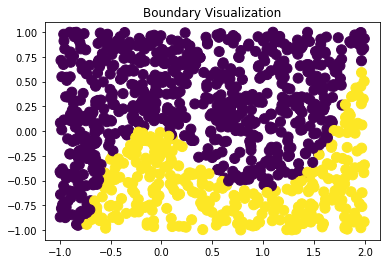

In [21]:
plt.title("Boundary Visualization")
plt.scatter(a, b, c=y_, marker="o", s=100)